<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:150%; text-align:left">
<h3 align="center"><font color='#DEB887'>SMS Spam Detection Model </font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

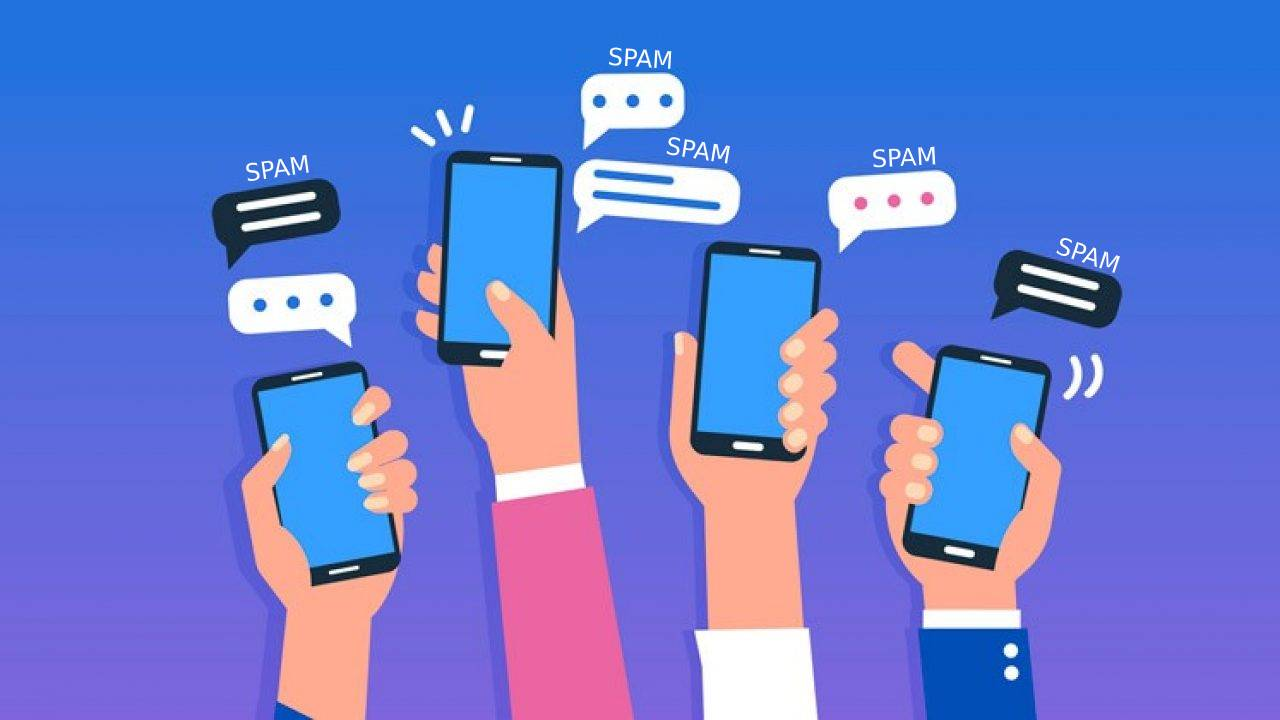

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          color:black;
          font-size:150%;
          text-align:center;">
Goal of  Model
    <p style="padding: 9px;
              color:black;
              font-size:90%;
              text-align: center;">
     To Detection of Spam or Ham Sms
   
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Source of Data : Kaggle
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Work Flow:
</p>
</div>

<p style="text-align: center;">
  <b>Step 1: Importing the required libraries</b><br>
  <b>Step 2: Loading the DataSet</b><br>
  <b>Step 3: Basic Understanding of Data</b><br>
  <b>Step 4:  Data Preprocessing</b><br>
  <b>Step 5: Exploratory Data Analysis & Text Preprocessing</b><br>
  <b>Step 6: Model Training, Building and Evaluation</b>
</p>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 1: Importing the Required Libraries
</p>
</div>

In [12]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 2: Loading the Data set
</p>
</div>

In [13]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 3: Basic Understanding of Data
</p>
</div>

## Preview of data

In [14]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
992,ham,Up to Ì_... ÌÏ wan come then come lor... But i...,NaN,NaN,NaN
3173,ham,It vl bcum more difficult..,NaN,NaN,NaN
220,ham,Ok no prob. Take ur time.,NaN,NaN,NaN
4813,ham,Ummmmmaah Many many happy returns of d day my ...,NaN,NaN,NaN
1971,ham,Enjoy ur life. . Good night,NaN,NaN,NaN


### How big is the Data

In [15]:
df.shape

(5572, 5)

**Observation**:
- This Dataset has 5572 rows and 5 columns

### Basic information of data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Observation**:
- Some columns have missing values.
- All columns are object types.

### Fetching column names

In [17]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

####  Columns Description

- v1 contains ham or spam and v2 contains our message(both are not correct name for analysis point of view so we will rename their name later. And rest are Missing values so will remove next step.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 4: Preprocessing
</p>
</div>

## Detection of Missing values & their %

In [18]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [19]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"----------",df[i].isnull().sum()*100/df.shape[0],"%")

Unnamed: 2 ---------- 99.10265613783201 %
Unnamed: 3 ---------- 99.78463747307968 %
Unnamed: 4 ---------- 99.89231873653985 %


####  Observation

- Very High Missing values % so we will drop all the three columns (Unnamed: 2,Unnamed: 3,Unnamed: 4)

In [20]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [21]:
df.isnull().sum().sum()   #Recheck missing using values

0

### Rename the column names

In [22]:
df.sample(5)

,v1,v2
4260,ham,Pls dont forget to study
2860,ham,I am not at all happy with what you saying or ...
195,ham,Gud mrng dear hav a nice day
3641,ham,My house here e sky quite dark liao... If rain...
5494,ham,"Cool, we shall go and see, have to go to tip a..."


**v1 and v2 are not proper or correct names for further use so we will rename it**

In [23]:
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True) #renameing the columns

In [24]:
df.sample(5)

,Target,Text
2390,ham,First has she gained more than &lt;#&gt; kg s...
2793,ham,"The affidavit says &lt;#&gt; E Twiggs St, di..."
993,ham,The Xmas story is peace.. The Xmas msg is love...
4891,ham,Miserable. They don't tell u that the side eff...
1452,ham,"That's good, because I need drugs"


## Detection of Duplicate Values

In [25]:
df.duplicated().sum()

403

**Observation**

- There are 403 duplicate values in it so we will remove it.

In [26]:
df=df.drop_duplicates(keep="first") #remove Duplicates

In [27]:
df.duplicated().sum() #Recheck the Duplicacy

0

In [28]:
df.shape

(5169, 2)

## Checking the inconsistency or invalid value  in the columns

In [29]:
df_obj=df.select_dtypes(include="object")
for i in df_obj:
    print(i,"------------",df[i].unique(),"has",df[i].nunique(),"values","\n\n")

Target ------------ ['ham' 'spam'] has 2 values 


Text ------------ ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name'] has 5169 values 




In [30]:
df_obj=df.select_dtypes(include="object")
for i in df_obj:
    print(i,"---------------",df[i].unique(),"has",df[i].nunique(),"values","\n\n")

Target --------------- ['ham' 'spam'] has 2 values 


Text --------------- ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name'] has 5169 values 




**Observation**

- There is no Invalid values in this data.

# Encoding our Target variables by using Label encoder

In [31]:
Encoder=LabelEncoder()

In [32]:
df["Target"]=Encoder.fit_transform(df["Target"])

In [33]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 5: Exploratory Data Analysis
</p>
</div>

# Univariate/Bivariate Analysis

In [34]:
df.head(2)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [35]:
df["Target"].unique()

array([0, 1])

In [36]:
df["Target"].value_counts()

,count
Target,
0,4516
1,653


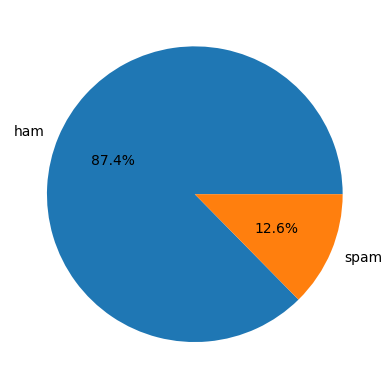

In [37]:
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%.1f%%");

**Observation**
- 87.4% is ham mail in our data
- 12.6% is spam mail in our data

and It is Imbalance data set.

In [38]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Feature Engineering

**Creating three columns for deeper analysis**

- No of Character in the text
- No of Words in the text
- No of Sentences in the text

In [39]:
df["No of Characters"]=df["Text"].apply(len) #No of Characters

In [40]:
df.head(2)

,Target,Text,No of Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [41]:
df["No of Words"]=df["Text"].apply(lambda x:len(nltk.word_tokenize(x))) #No of Words

In [42]:
df.head(2)

,Target,Text,No of Characters,No of Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [43]:
df["No of Sentences"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [44]:
df.head(2)

,Target,Text,No of Characters,No of Words,No of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [45]:
df[["No of Characters","No of Words","No of Sentences"]].describe()

,No of Characters,No of Words,No of Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
#ham
df[df["Target"]==0][["No of Characters","No of Words","No of Sentences"]].describe()

,No of Characters,No of Words,No of Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**Observation**

- Avg no of Character in ham SMS is around 70
- Avg no of Words in ham is around 17
- Avg no of Sentences in ham is greater than 1



In [47]:
#spam
df[df["Target"]==1][["No of Characters","No of Words","No of Sentences"]].describe()

,No of Characters,No of Words,No of Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


**Observation**

- Avg no of Character in spam SMS is around 137
- Avg no of Words in spam is around 27
- Avg no of Sentences in ham is around 2

Conclusion spam Characters,words,Sentences is bigger in length as compare to ham



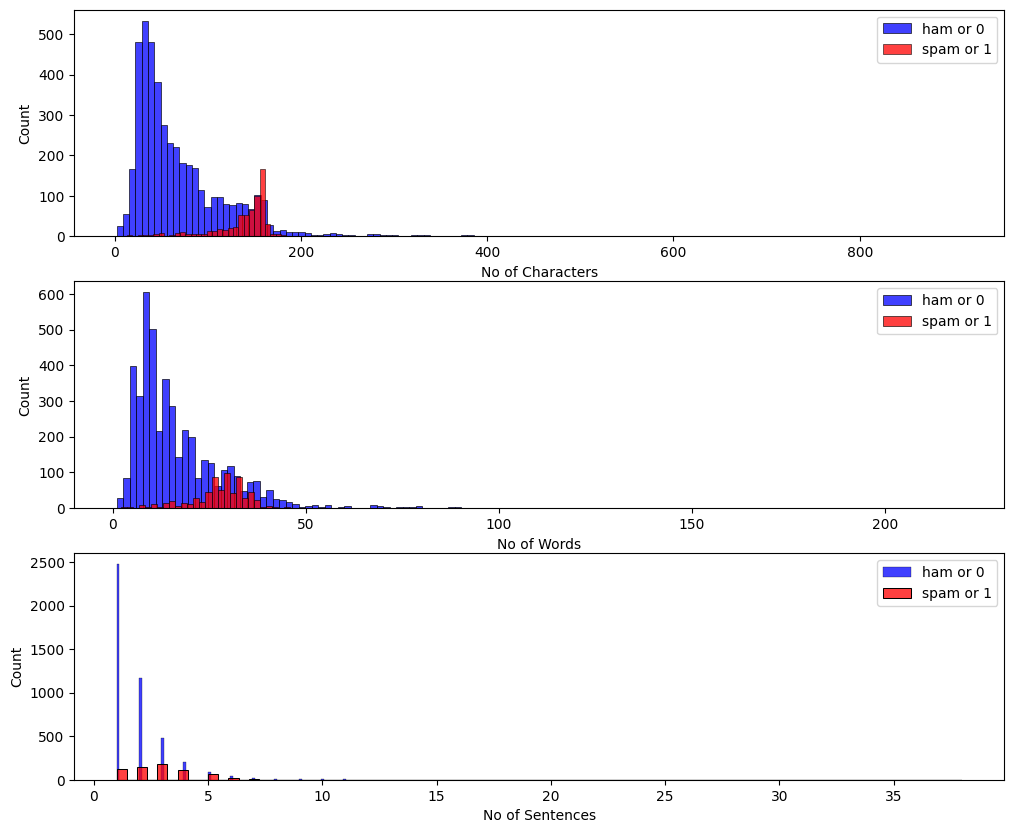

In [48]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.histplot(df[df["Target"]==0]["No of Characters"],label="ham or 0",color="blue")
sns.histplot(df[df["Target"]==1]["No of Characters"],color="red",label="spam or 1")
plt.legend()
plt.subplot(3,1,2)
sns.histplot(df[df["Target"]==0]["No of Words"],label="ham or 0",color="blue")
sns.histplot(df[df["Target"]==1]["No of Words"],color="red",label="spam or 1")
plt.legend()
plt.subplot(3,1,3)
sns.histplot(df[df["Target"]==0]["No of Sentences"],label="ham or 0",color="blue")
sns.histplot(df[df["Target"]==1]["No of Sentences"],color="red",label="spam or 1")
plt.legend()

In [49]:
df.head(2)

,Target,Text,No of Characters,No of Words,No of Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


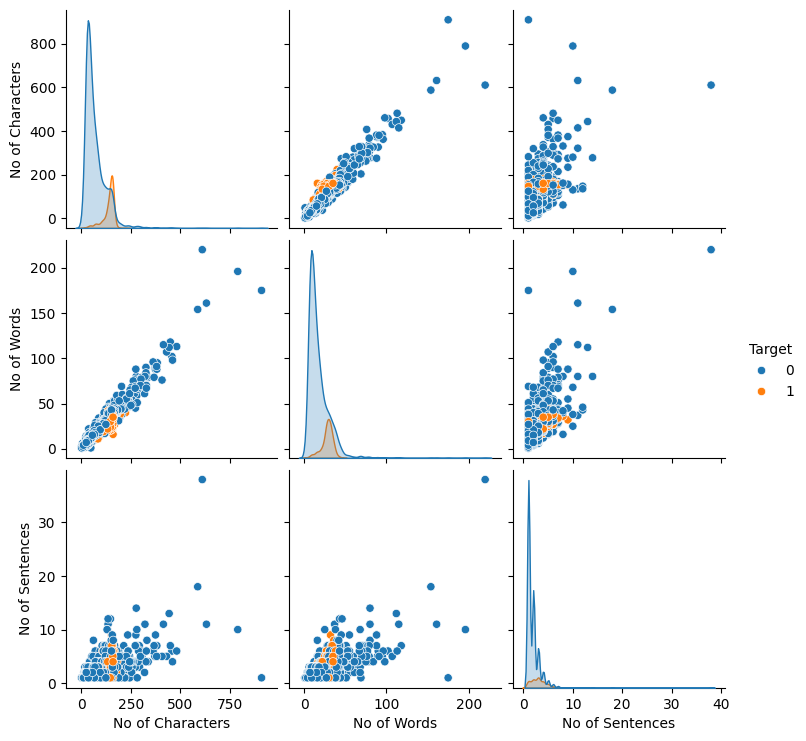

In [50]:
sns.pairplot(df,hue="Target")

**Observation**
- There is outlier in the data

In [51]:
df_num=df.select_dtypes(exclude="object")
df_num

,Target,No of Characters,No of Words,No of Sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


In [52]:
df_num.corr()

,Target,No of Characters,No of Words,No of Sentences
Target,1.000000,0.384717,0.262912,0.263939
No of Characters,0.384717,1.000000,0.965760,0.624139
No of Words,0.262912,0.965760,1.000000,0.679971
No of Sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

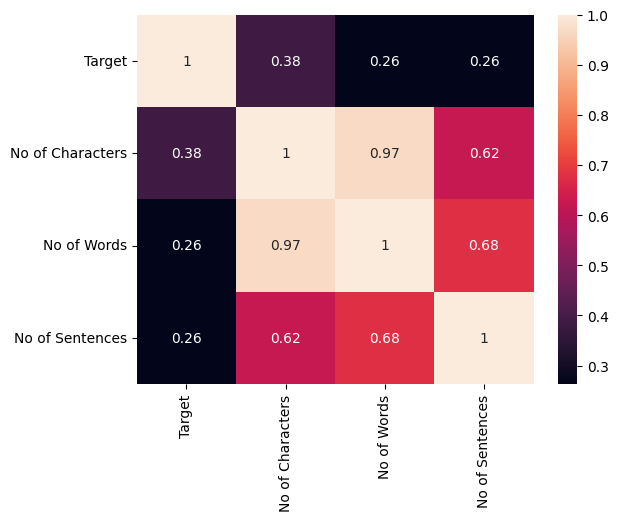

In [53]:
sns.heatmap(df_num.corr(),annot=True)

**Observation**
- Highly correlation between No of Sentences and No of Characters
- Highly correlation between No of Sentences and No of Words
- Highly correlation between No of Words and No of Characters

so we can't take all the columns for further use due to Multicollinearity and creates the problem
like Overfitting, Increase Variance. So we'll use No of Characters column.

# Text Preprocessing

- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [54]:
nltk.download('stopwords')
stopwords.words("english")
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
df["transformed_text"]=df["Text"].apply(transform_text)

In [56]:
df.head(2)

,Target,Text,No of Characters,No of Words,No of Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


### Mostly Common words in Spam & Ham messages presenting through WordCloud

In [57]:
# For Spam messages
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,min_font_size=10,background_color="white")

In [58]:
spam_wc=wc.generate(df[df["Target"]==1]["transformed_text"].str.cat(sep=" "))

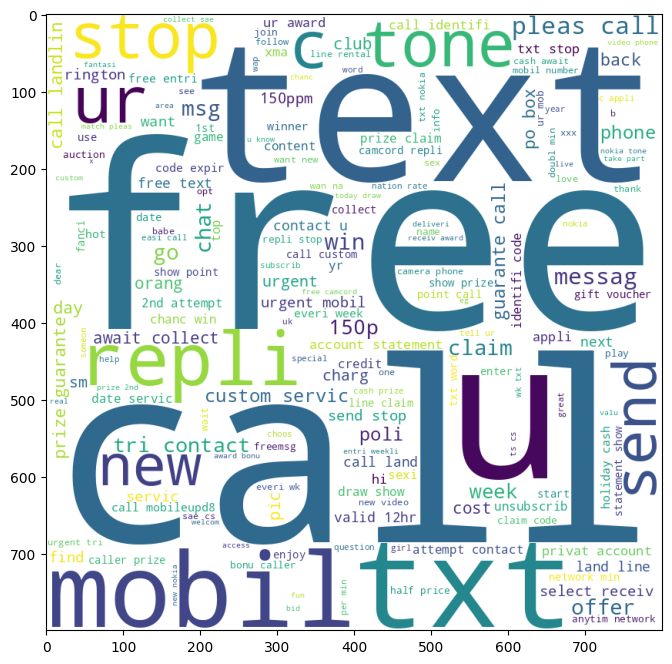

In [59]:
plt.figure(figsize=(14,8))
plt.imshow(spam_wc)

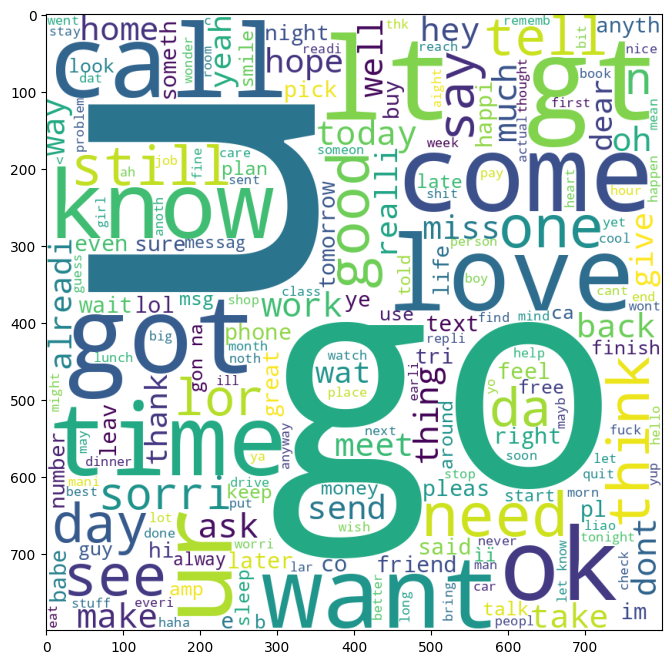

In [60]:
# For Ham messages

from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,min_font_size=10,background_color="white")
spam_wc=wc.generate(df[df["Target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(14,8))
plt.imshow(spam_wc)

### Top 30 most Common Words in Spam & Ham

**Spam Words**

In [61]:
Spam_messages=[]
for i in df[df["Target"]==1]["transformed_text"].tolist():
    for word in i.split():
        Spam_messages.append(word)

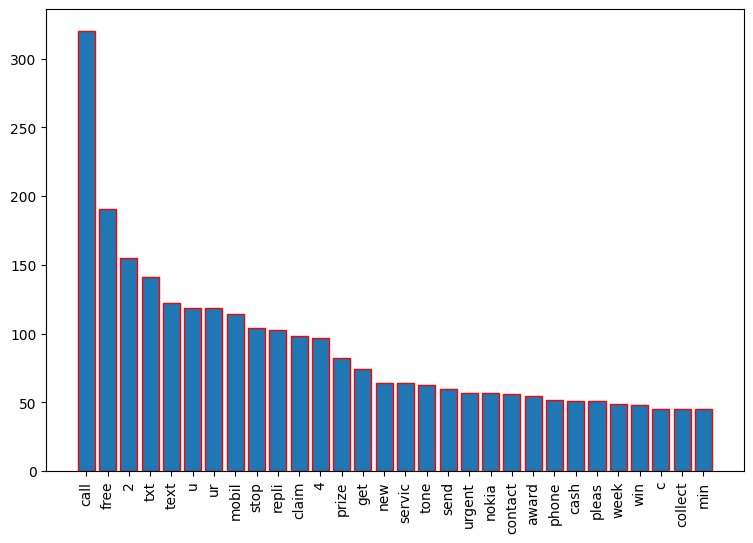

In [62]:
from collections import Counter
plt.figure(figsize=(9,6))
plt.bar(
    pd.DataFrame(Counter(Spam_messages).most_common(30))[0],
    pd.DataFrame(Counter(Spam_messages).most_common(30))[1],edgecolor="red"
)
plt.xticks(rotation='vertical')
plt.show()

**Ham Words**

In [63]:
Ham_messages=[]
for i in df[df["Target"]==0]["transformed_text"].tolist():
    for word in i.split():
        Ham_messages.append(word)

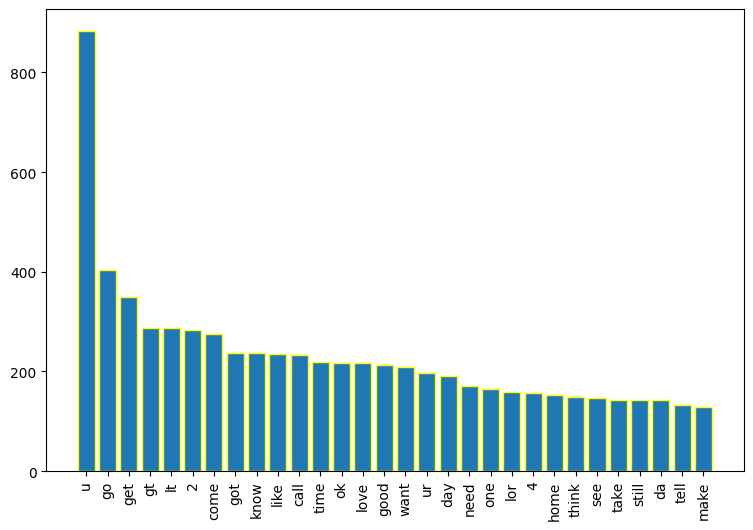

In [64]:
from collections import Counter
plt.figure(figsize=(9,6))
plt.bar(
    pd.DataFrame(Counter(Ham_messages).most_common(30))[0],
    pd.DataFrame(Counter(Ham_messages).most_common(30))[1],edgecolor="yellow"
)
plt.xticks(rotation='vertical')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:180%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:110%;
          text-align:center;">
Step 6: Model Training, Building &  Evaluation
</p>
</div>

#### Handle imbalance problem using over sampling technique SMOTE by install imblearn

In [65]:
# pip install imblearn

### Segregating of Features (x) and Target (y)

In [66]:
# cv=CountVectorizer()      # Initially used CountVectorizer(), but switched to TfidfVectorizer() for better results.
tfidf = TfidfVectorizer()

In [67]:
x=tfidf.fit_transform(df["transformed_text"]).toarray()

In [68]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
x.shape

(5169, 6708)

In [70]:
y=df["Target"].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
from imblearn.over_sampling import SMOTE
#smote: Synthetic Minority Oversampling Technique.

In [78]:
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)


In [79]:
from collections import Counter
Counter(y_smote)

Counter({0: 4516, 1: 4516})

In [80]:
x_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
y_smote

array([0, 0, 1, ..., 1, 1, 1])

## Dividing the data into train and test

In [82]:
x_train,x_test,y_train, y_test= train_test_split(x_smote,y_smote,test_size=0.2 ,random_state=2)

# Training, Building, Evaulation of Model by Using Naive Bayes

In [83]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [85]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
y_pred_train1=gnb.predict(x_train)
cv_scores = cross_val_score(gnb, x_train, y_train, cv=10, scoring='accuracy')  
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean() * 100)

print(" Accuracy at Training data",accuracy_score(y_train,y_pred_train1)*100)
print("Accuracy at Testing data",accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))

Cross-validation Accuracy Scores: [0.92116183 0.91562932 0.93222683 0.91839557 0.93084371 0.94044321
 0.92105263 0.93351801 0.93074792 0.92520776]
Mean Cross-validation Accuracy: 92.69226790496661
 Accuracy at Training data 95.25259515570934
Accuracy at Testing data 92.41837299391257
[[770 136]
 [  1 900]]
0.8687258687258688
0.9988901220865705


In [86]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
y_pred_train2=mnb.predict(x_train)
cv_scores = cross_val_score(mnb, x_train, y_train, cv=10, scoring='accuracy')  
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean() * 100)

print(" Accuracy at Training data",accuracy_score(y_train,y_pred_train2)*100)
print("Accuracy at Testing data",accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred1))

Cross-validation Accuracy Scores: [0.97233748 0.97095436 0.98201936 0.98201936 0.98201936 0.97368421
 0.96537396 0.98060942 0.97506925 0.97645429]
Mean Cross-validation Accuracy: 97.60541066577778
 Accuracy at Training data 98.44982698961938
Accuracy at Testing data 98.22910902047593
[[882  24]
 [  8 893]]
0.9738276990185387
0.9988901220865705


In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [88]:
bnb=BernoulliNB()

In [89]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
y_pred_train3=mnb.predict(x_train)

cv_scores = cross_val_score(mnb, x_train, y_train, cv=10, scoring='accuracy')  # Can also try 'precision'
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean() * 100)

print(" Accuracy at Training data",accuracy_score(y_train,y_pred_train3)*100)
print("Accuracy at Testing data",accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred1))

Cross-validation Accuracy Scores: [0.97233748 0.97095436 0.98201936 0.98201936 0.98201936 0.97368421
 0.96537396 0.98060942 0.97506925 0.97645429]
Mean Cross-validation Accuracy: 97.60541066577778
 Accuracy at Training data 98.44982698961938
Accuracy at Testing data 99.33591588267848
[[906   0]
 [ 12 889]]
1.0
0.9988901220865705


# Training, Building, Evaulation of Model by Using Different Algorithms

###### Support Vector Machine, KNearestNeighbors, DecisionTree, LogisticRegression, RandomForest, 
###### AdaBoost, Bagging, ExtraTrees, GradientBoosting, XtraGreadientBoosting 

In [90]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [91]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [92]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)



    return accuracy,precision

In [93]:
train_classifier(svc,x_train,y_train,x_test,y_test)


(0.993912562257886, 0.9911699779249448)

In [95]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision= train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.993912562257886
Precision -  0.9911699779249448
For  KN
Accuracy -  0.991698948533481
Precision -  0.9988738738738738
For  NB
Accuracy -  0.9933591588267847
Precision -  1.0
For  DT
Accuracy -  0.9192030990592142
Precision -  0.9467455621301775
For  LR
Accuracy -  0.9734366353071389
Precision -  0.976536312849162
For  RF
Accuracy -  0.9928057553956835
Precision -  0.998876404494382
For  AdaBoost
Accuracy -  0.977863862755949
Precision -  0.984251968503937
For  BgC
Accuracy -  0.9767570558937465
Precision -  0.9663409337676439
For  ETC
Accuracy -  0.9972329828444937
Precision -  0.9977777777777778
For  GBDT
Accuracy -  0.9501936912008855
Precision -  0.9592298980747452
For  xgb
Accuracy -  0.9767570558937465
Precision -  0.9788182831661093


In [96]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [97]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.993359,1.000000
5,RF,0.992806,0.998876
1,KN,0.991699,0.998874
8,ETC,0.997233,0.997778
0,SVC,0.993913,0.991170
6,AdaBoost,0.977864,0.984252
10,xgb,0.976757,0.978818
4,LR,0.973437,0.976536
7,BgC,0.976757,0.966341
9,GBDT,0.950194,0.959230


In [98]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [99]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.993359
1,RF,Accuracy,0.992806
2,KN,Accuracy,0.991699
3,ETC,Accuracy,0.997233
4,SVC,Accuracy,0.993913
5,AdaBoost,Accuracy,0.977864
6,xgb,Accuracy,0.976757
7,LR,Accuracy,0.973437
8,BgC,Accuracy,0.976757
9,GBDT,Accuracy,0.950194


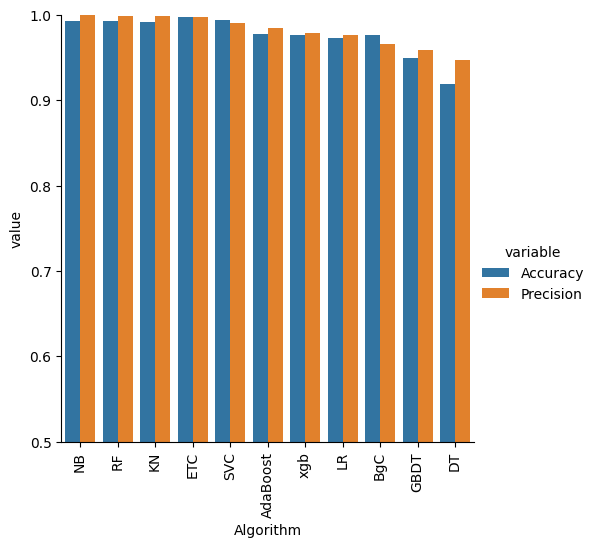

In [100]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Apply Voting Classifier

#### Implementation of Voting Classifier for Improved Model Performance

In [101]:
knc = KNeighborsClassifier()
bnb=BernoulliNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [102]:
voting = VotingClassifier(estimators=[('KN', knc), ('nb', bnb),('RF', rfc), ('et', etc)],voting='soft')

In [103]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('KN', KNeighborsClassifier()),
                             ('nb', BernoulliNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [104]:
y_pred_train=voting.predict(x_train)
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Accuracy",accuracy_score(y_train,y_pred_train))

print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9972329828444937
Accuracy 1.0
Precision 1.0


# Applying Stacking Classifier

#### Implementation of Stacking Classifier for Enhanced Predictive Performance

In [105]:
estimators=[('KN', knc), ('nb', bnb),('RF', rfc), ('et', etc)]
final_estimator=RandomForestClassifier()

In [106]:
from sklearn.ensemble import StackingClassifier

In [107]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [113]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred_train=clf.predict(x_train)
print("Accuracy at Training",accuracy_score(y_train,y_pred_train)*100)
print("Accuracy at Testing",accuracy_score(y_test,y_pred)*100)
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))

Accuracy at Training 100.0
Accuracy at Testing 99.88931931377975
Precision 0.9988901220865705
Recall 0.9988901220865705


In [115]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", cv_scores.mean() * 100)
print("Standard Deviation of Cross-Validation Accuracy: ", cv_scores.std() * 100)

# Fit the model on the training data
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

# Evaluate the model on the training and test set
print("Accuracy at Training", accuracy_score(y_train, y_pred_train) * 100)
print("Accuracy at Testing", accuracy_score(y_test, y_pred) * 100)
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))


Cross-Validation Accuracy Scores:  [0.99723183 0.99930796 0.99861592 0.99861592 0.99861592]
Mean Cross-Validation Accuracy:  99.84775086505189
Standard Deviation of Cross-Validation Accuracy:  0.06780594443690562
Accuracy at Training 100.0
Accuracy at Testing 99.88931931377975
Precision 0.9988901220865705
Recall 0.9988901220865705


# Model Performance Observation

- **Cross-Validation Accuracy:**  
  The average accuracy from cross-validation is **99.85%** with a small variation, indicating the model performs well.

- **Training Accuracy:**  
  The model has a **100% accuracy** on training data which is great.

- **Test Accuracy:**  
  The test accuracy is **99.89%**, showing that the model works well on unseen data.

- **Precision & Recall:**
  Both precision and recall are **99.89%**, meaning the model rarely makes mistakes.
  
### **Conclusion:**
The model shows **excellent performance** with high accuracy.
